In [1]:
# Change working directory
%cd ..

d:\HUST\OT factorization\ot-kpgf


c:\Users\nguye\Apps\anaconda3\envs\ot-kpgf\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import json
import pandas as pd
import numpy as np
import scipy
import os
import ot
from optimal_transport.models import KeypointFOT, FOT, LOT, EMD
from optimal_transport.experiments import USPSToMNIST, DUMNIST, RobustSampling
from typing import Tuple, Optional, List, Union, Dict

# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

In [ ]:
#@title USPS to MNIST
n_anchors = 10
model = {
    "KeypointFOT": KeypointFOT(n_free_anchors=n_anchors, guide_mixing=0.5, stop_thr=1e-5,
                               sinkhorn_reg=0.001, temperature=0.1, div_term=1e-20, max_iters=200),
    "FOT": FOT(n_anchors=n_anchors, sinkhorn_reg=0.1),
    "LOT": LOT(None, n_source_anchors=n_anchors, n_target_anchors=n_anchors, epsilon=10, epsilon_z=10),
    "OT": EMD(),
}
experiment = USPSToMNIST(model=model, log_dir="logs")
results = experiment(keypoints_per_cls=1, n_keypoints=10)

In [3]:
#@title DU-MNIST
n_anchors = 10
model = {
    "KeypointFOT": KeypointFOT(n_free_anchors=n_anchors, guide_mixing=0.5, stop_thr=1e-5,
                               sinkhorn_reg=0.001, temperature=0.1, div_term=1e-20, max_iters=200),
    "FOT": FOT(n_anchors=n_anchors, sinkhorn_reg=0.1),
    "LOT": LOT(None, n_source_anchors=n_anchors, n_target_anchors=n_anchors, epsilon=10, epsilon_z=10),
    "OT": EMD(),
}

experiment = DUMNIST(model, log_dir="logs")
results = experiment(keypoints_per_cls=1, n_keypoints=7, dropout_cls=[0, 2, 8], size=1000)

Accuracy: {'mnist_train': 0.993, 'mnist_test': 0.9705, 'usps_train': 0.869, 'usps_test': 0.802}
[None] Accuracy: 0.551
[KeypointFOT] Accuracy: 0.607, L2: 132.37177445206217, Runtime: 78.66827607154846
[FOT] Accuracy: 0.583, L2: 151.97987908276045, Runtime: 25.7286696434021
[LOT] Accuracy: 0.604, L2: 145.59825904367545, Runtime: 11.030415773391724
[OT] Accuracy: 0.574, L2: 168.57940716190117, Runtime: 0.07535743713378906


Accuracy: {'mnist_train': 0.993, 'mnist_test': 0.9705, 'usps_train': 0.869, 'usps_test': 0.802}
------ At 50 samples ------
[KeypointFOT] Accuracy: 0.78, Runtime: 3.830076217651367
[FOT] Accuracy: 0.74, Runtime: 12.742462873458862
[LOT] Accuracy: 0.68, Runtime: 3.4248249530792236
[OT] Accuracy: 0.78, Runtime: 0.006972312927246094
------ At 100 samples ------
[KeypointFOT] Accuracy: 0.85, Runtime: 6.095450162887573
[FOT] Accuracy: 0.77, Runtime: 19.881686449050903
[LOT] Accuracy: 0.78, Runtime: 3.703880548477173
[OT] Accuracy: 0.81, Runtime: 0.015002012252807617
------ At 150 samples ------
[KeypointFOT] Accuracy: 0.7866666666666666, Runtime: 8.728151082992554
[FOT] Accuracy: 0.7333333333333333, Runtime: 28.713064670562744
[LOT] Accuracy: 0.7266666666666667, Runtime: 5.464411020278931
[OT] Accuracy: 0.7733333333333333, Runtime: 0.03200650215148926
------ At 200 samples ------
[KeypointFOT] Accuracy: 0.84, Runtime: 14.532259941101074
[FOT] Accuracy: 0.735, Runtime: 28.99761939048767
[LOT

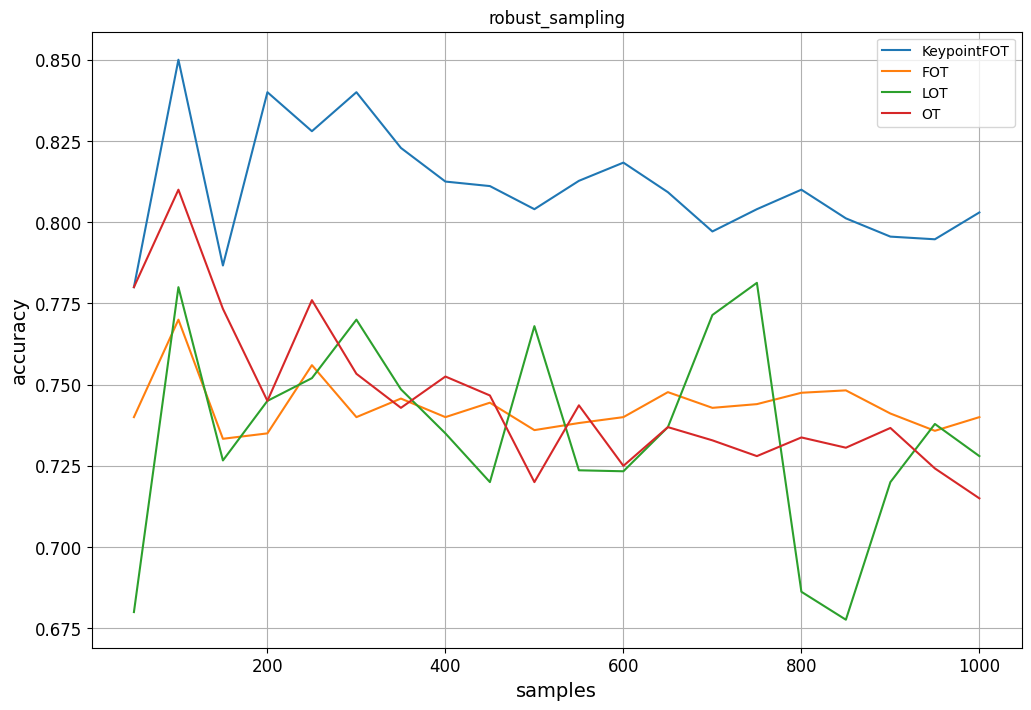

In [3]:
#@title Robust to sampling
n_anchors = 10
model = {
    "KeypointFOT": KeypointFOT(n_free_anchors=n_anchors, guide_mixing=0.5, stop_thr=1e-5,
                               sinkhorn_reg=0.001, temperature=0.1, div_term=1e-20, max_iters=200),
    "FOT": FOT(n_anchors=n_anchors, sinkhorn_reg=0.1),
    "LOT": LOT(None, n_source_anchors=n_anchors, n_target_anchors=n_anchors, epsilon=10, epsilon_z=10),
    "OT": EMD(),
}

experiment = RobustSampling(model, log_dir="logs")
results = experiment(keypoints_per_cls=1, n_keypoints=10, 
                     min_samples=50, max_samples=1000, freq_samples=50)